<a href="https://colab.research.google.com/github/arora285/HelloWorld/blob/main/Big_Mart_Sale_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Objective:
The below kernel is a solution to the regression problem with an objective to predict the big mart sales based on the provided sales figures along with other features.

After a succsessful EDA different models were experimented to get least error i.e best r2 score. Also, in order to accomplish this models were further optimised by tuning the hyperparameters using random and grid search CV methods.

## 2. Importing initial libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 3. Loading data

In [56]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Big Mart Sales/Train.csv")

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 4. Static and descriptive Information

In [58]:
df.shape

(8523, 12)

In [59]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [60]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [62]:
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

##  5. Preprocessing of data

In [63]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [64]:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == "object":
        cat_col.append(x)



In [65]:
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [66]:
# cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [67]:
for sub_cat in cat_col:
    print(sub_cat)
    print(df[sub_cat].value_counts())
    print()

Item_Identifier
FDW13    10
FDG33    10
DRE49     9
FDF52     9
FDT07     9
         ..
FDE52     1
FDN52     1
FDC23     1
FDT35     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier

In [68]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5.1. Filling missing values

In [69]:
#  Let's fill the missing values

item_weight_mean = df.pivot_table(values="Item_Weight", index="Item_Identifier")
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [70]:
miss_bool = df["Item_Weight"].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [71]:
for i, item in enumerate(df["Item_Identifier"]):
    if miss_bool[i]:
        if item in item_weight_mean:
            df["Item_Weight"][i] = item_weight_mean.loc[item]["Item_Weight"]
        else:
            df["Item_Weight"][i] = np.mean(df["Item_Weight"])
        

In [72]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [73]:
df["Item_Weight"].isnull().sum()

0

In [74]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [75]:
miss_bool = df['Outlet_Size'].isnull()
miss_bool

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [76]:
df.loc[miss_bool, 'Outlet_Size']

3       NaN
8       NaN
9       NaN
25      NaN
28      NaN
       ... 
8502    NaN
8508    NaN
8509    NaN
8514    NaN
8519    NaN
Name: Outlet_Size, Length: 2410, dtype: object

In [77]:
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [78]:
df["Item_Weight"].isnull().sum()

0

In [79]:
sum(df['Item_Visibility'] ==0)

526

In [80]:
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [81]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.066132,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [82]:
sum(df['Item_Visibility'] ==0)

0

5.2. Feature Engineering

In [83]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})

In [84]:
for sub_cat in cat_col:
    print(sub_cat)
    print(df[sub_cat].value_counts())
    print()

Item_Identifier
FDW13    10
FDG33    10
DRE49     9
FDF52     9
FDT07     9
         ..
FDE52     1
FDN52     1
FDC23     1
FDT35     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: in

In [85]:
# Adding and replacing the features.

df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [86]:
df['New_Item_Type'] = df['New_Item_Type'].replace({'FD':'Food', 'DR':'Drinks', 'NC':'Non-Consumable'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [87]:
df.loc[df['New_Item_Type'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'

In [88]:
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [89]:
df["Outlet_Span"] = 2013 - df["Outlet_Establishment_Year"]

In [90]:
df["Outlet_Span"]

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Span, Length: 8523, dtype: int64

In [91]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Span
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


## 6. Exploratory Data Analysis

In [92]:
df.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Non-Edible
Item_Visibility,0.0160473,0.0192782,0.0167601,0.066132,0.066132
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.809,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,Small,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


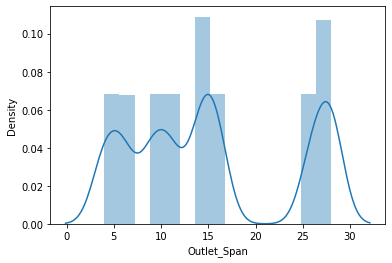

In [93]:
sns.distplot(df.Outlet_Span)

In [94]:
# from sklearn.preprocessing import RobustScaler
# from sklearn.compose import ColumnTransformer
# cols = ["Outlet_Span", "Item_Outlet_Sales", "Item_Weight", "Item_MRP", "Item_Visibility"]
# scaler = RobustScaler()

# num_df = pd.DataFrame(ColumnTransformer([("scaler", scaler, cols)]).fit_transform(df), columns=cols)
# num_df

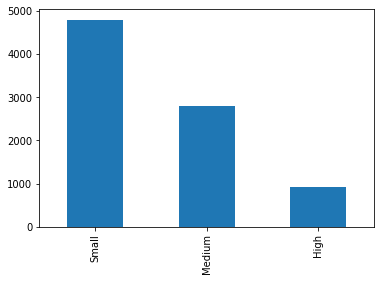

In [95]:
df['Outlet_Size'].value_counts().plot.bar();

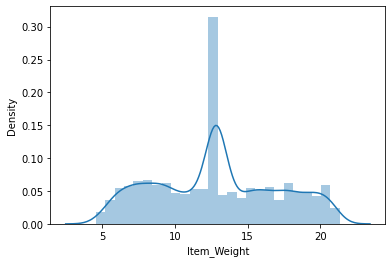

In [96]:
sns.distplot(df['Item_Weight']);

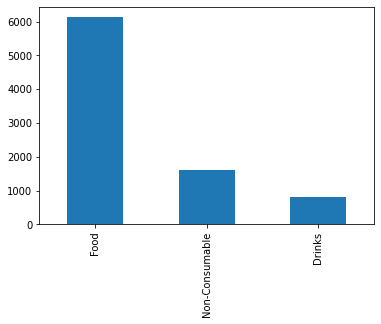

In [97]:
df['New_Item_Type'].value_counts().plot(kind='bar');

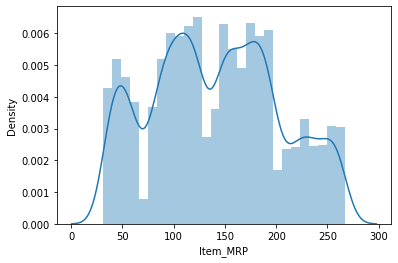

In [98]:
sns.distplot(df['Item_MRP']);

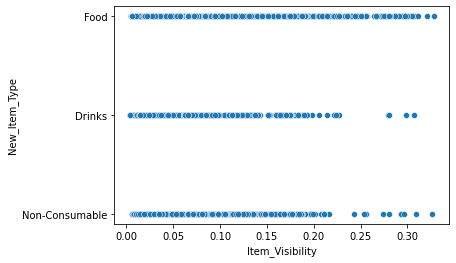

In [99]:
sns.scatterplot(x=df['Item_Visibility'], y=df.New_Item_Type);

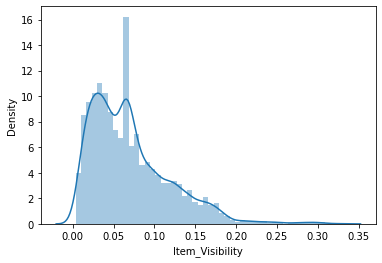

In [100]:
sns.distplot(df.Item_Visibility)

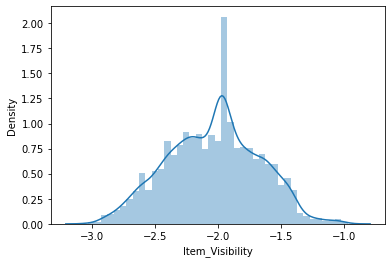

In [101]:
from scipy import stats
df.Item_Visibility, parameter = stats.boxcox(df.Item_Visibility)
sns.distplot(df.Item_Visibility)

In [52]:
df[df == 0].any().any()

False

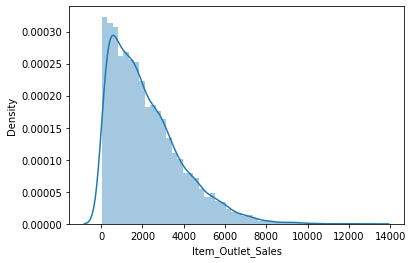

In [104]:
sns.distplot(df.Item_Outlet_Sales)

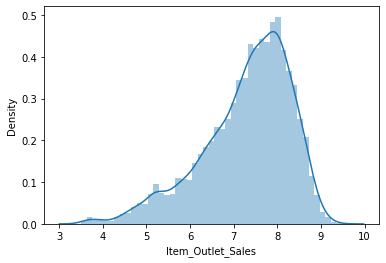

In [105]:
df.Item_Outlet_Sales = np.log(df.Item_Outlet_Sales)
sns.distplot(df.Item_Outlet_Sales)

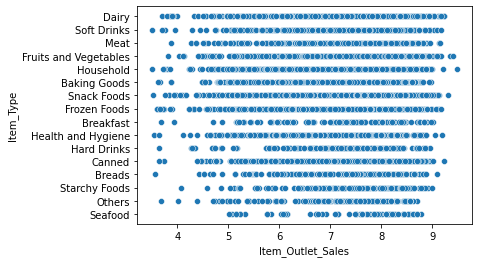

In [106]:
sns.scatterplot(x=df['Item_Outlet_Sales'], y=df.Item_Type);

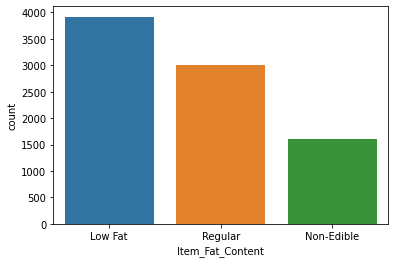

In [132]:
sns.countplot(df['Item_Fat_Content']);

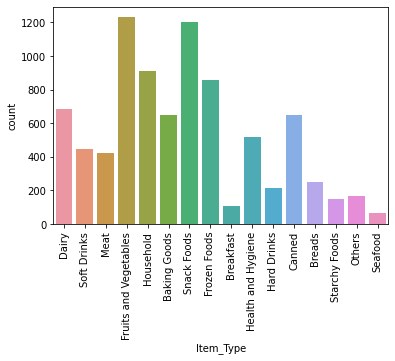

In [133]:
sns.countplot(df['Item_Type']);
plt.xticks(rotation=90);

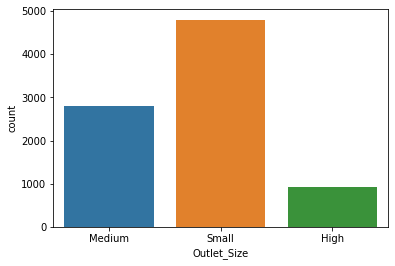

In [134]:
sns.countplot(df['Outlet_Size']);

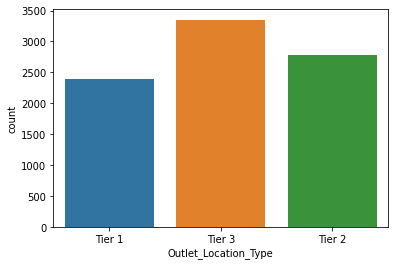

In [135]:
sns.countplot(df['Outlet_Location_Type']);

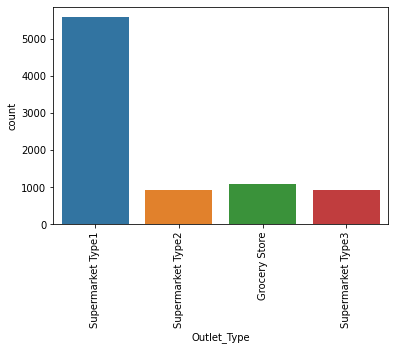

In [136]:
sns.countplot(df['Outlet_Type']);
plt.xticks(rotation=90);

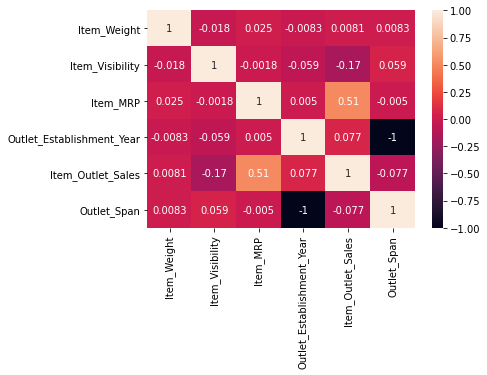

In [107]:
corr = df.corr()
sns.heatmap(corr, annot=True);

In [108]:
df.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Non-Edible
Item_Visibility,-2.58058,-2.51351,-2.56497,-1.97384,-1.97384
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.809,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,Small,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


In [110]:
df_new = df.drop(["Item_Identifier", "Item_Weight", "Outlet_Establishment_Year"], axis=1)

## 7. Modelling

7.1. Conversion of categorical data into numbers.

In [111]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_new.Outlet_Size = le.fit_transform(df_new.Outlet_Size)

In [112]:
df_new = df_new.drop(["Item_Type", "Outlet_Identifier"], axis=1)

7.2.Correlation

In [113]:
data = pd.get_dummies(df_new, columns=['Item_Fat_Content', 'Outlet_Location_Type','Outlet_Type', 'New_Item_Type'])

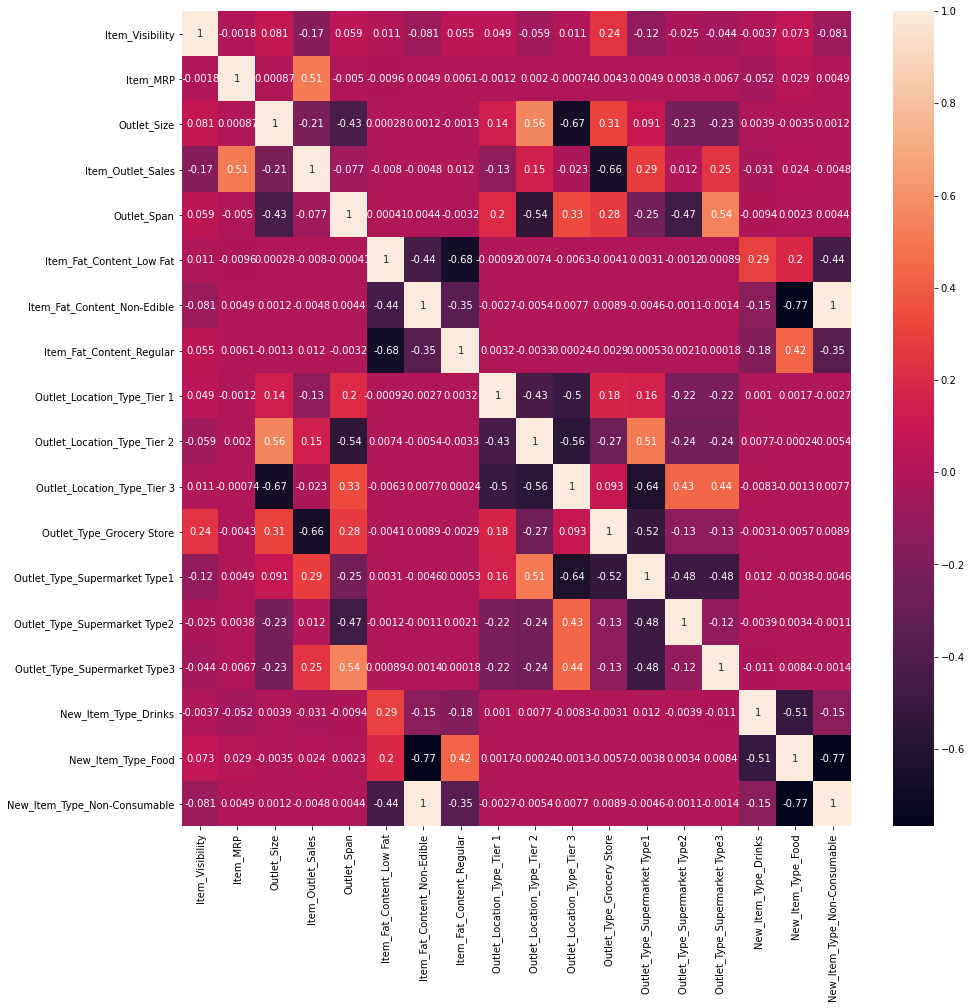

In [114]:
corr = data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True)

In [115]:
data.head()

,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Outlet_Span,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,-2.580579,249.8092,1,8.225540,14,1,0,0,1,0,0,0,1,0,0,0,1,0
1,-2.513511,48.2692,1,6.094524,4,0,0,1,0,0,1,0,0,1,0,1,0,0
2,-2.564965,141.6180,1,7.648392,14,1,0,0,1,0,0,0,1,0,0,0,1,0
3,-1.973841,182.0950,2,6.596300,15,0,0,1,0,0,1,1,0,0,0,0,1,0
4,-1.973841,53.8614,0,6.902446,26,0,1,0,0,0,1,0,1,0,0,0,0,1


7.3. Spliting the data and fitting the model

In [116]:
x = data.drop(["Item_Outlet_Sales", "Item_Fat_Content_Low Fat",	"Item_Fat_Content_Non-Edible",	"Item_Fat_Content_Regular", "New_Item_Type_Non-Consumable"], axis=1)
y= data['Item_Outlet_Sales']
x.head()

,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Span,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food
0,-2.580579,249.8092,1,14,1,0,0,0,1,0,0,0,1
1,-2.513511,48.2692,1,4,0,0,1,0,0,1,0,1,0
2,-2.564965,141.6180,1,14,1,0,0,0,1,0,0,0,1
3,-1.973841,182.0950,2,15,0,0,1,1,0,0,0,0,1
4,-1.973841,53.8614,0,26,0,0,1,0,1,0,0,0,0


In [117]:
#  Splitting data into train and test sets


from sklearn.model_selection import train_test_split

np.random.seed(45)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [118]:
#  Put models in a dictionary

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, mean_squared_error, r2_score

models = {"Linear Regressor": LinearRegression(),
         "Lasso": Lasso(),
         "Ridge": Ridge(),
         "Random Forest": RandomForestRegressor(),
         "Decision Tree": DecisionTreeRegressor()}

def Fit_Score(model, x_train, y_train, x_test, y_test):
    """Will call the model from the dict defined above and will 
    evaluate the score based on that"""
    
    np.random.seed(45)
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_preds = model.predict(x_test)
        model_scores[name] = {"MAE": mean_absolute_error(y_test, y_preds),
                            "MSE": mean_squared_error(y_test, y_preds),
                            "R2": r2_score(y_test, y_preds),
                            }
    return model_scores



In [119]:
Scores = Fit_Score(models, x_train, y_train, x_test, y_test)
Scores

{'Decision Tree': {'MAE': 0.5707108980799583,
  'MSE': 0.5556804409414143,
  'R2': 0.46623942030631227},
 'Lasso': {'MAE': 0.673525356326234,
  'MSE': 0.7767691721402111,
  'R2': 0.25387195038333665},
 'Linear Regressor': {'MAE': 0.42598431810170373,
  'MSE': 0.3000017694290506,
  'R2': 0.7118323652200229},
 'Random Forest': {'MAE': 0.4426098581905095,
  'MSE': 0.32202503403411664,
  'R2': 0.6906778497534855},
 'Ridge': {'MAE': 0.4259738949476446,
  'MSE': 0.2999926618042946,
  'R2': 0.7118411135773723}}

7.4. Scores of base models. 

In [120]:
pd.DataFrame(Scores.values(), Scores.keys())

,MAE,MSE,R2
Linear Regressor,0.425984,0.300002,0.711832
Lasso,0.673525,0.776769,0.253872
Ridge,0.425974,0.299993,0.711841
Random Forest,0.442610,0.322025,0.690678
Decision Tree,0.570711,0.555680,0.466239


From above let's eliminate Lasso, Decision tree and improve other three models.

## 8. Further tunning of models.

8.1. Random Forrest Regressor

Using Randomised search cv

In [122]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [123]:

grid = {"n_estimators": np.arange(10, 1000, 100),
        "max_depth": [None, 3, 5],
        "min_samples_split": np.arange(2, 20, 2),
        "min_samples_leaf": np.arange(1, 20, 2),
        "max_features": ["Sqrt", "auto"]}

forest = RandomForestRegressor(n_jobs=-1)

rs_forest = RandomizedSearchCV(estimator=forest, param_distributions=grid, 
                               n_iter=10, cv=5, random_state=45, verbose=0, refit=True)

rs_forest.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [124]:
rs_forest.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'n_estimators': 310}

In [126]:
rs_preds = rs_forest.predict(x_test)
rs_Scores = {mean_absolute_error(y_test, rs_preds),
          mean_squared_error(y_test, rs_preds),
          mean_squared_log_error(y_test, rs_preds),
          r2_score(y_test, rs_preds)}
rs_Scores

{0.004607359239202257,
 0.27993142390966264,
 0.4097967222954246,
 0.731110998171242}

Using Grid search cv

In [127]:
np.random.seed(45)

grid_2 = {"n_estimators": [310, 1000],
        "max_depth": [3, 5],
        "min_samples_split":[4, 6],
        "min_samples_leaf": [2, 5],
        "max_features": ["auto"]}

gs_forest = GridSearchCV(forest, param_grid=grid_2, cv=5, refit=True, verbose=True, n_jobs=-1)

gs_forest.fit(x_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  3.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [128]:
gs_forest.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 1000}

In [129]:
gs_preds = gs_forest.predict(x_test)
gs_Scores = {mean_absolute_error(y_test, gs_preds),
          mean_squared_error(y_test, gs_preds),
          mean_squared_log_error(y_test, gs_preds),
          r2_score(y_test, gs_preds)}
gs_Scores

{0.004615939873365662,
 0.28016472163667006,
 0.40997712950161425,
 0.7308869033123377}

8.2. Ridge

In [130]:
np.random.seed(45)
Rig = Ridge(alpha=1, normalize=False, random_state=45)

Rig.fit(x_train, y_train)

rig_preds = Rig.predict(x_test)

rig_Scores = {mean_absolute_error(y_test, rig_preds),
              mean_squared_error(y_test, rig_preds),
              mean_squared_log_error(y_test, rig_preds),
              r2_score(y_test, rig_preds)}
rig_Scores




{0.004932279103804141,
 0.2999926618042946,
 0.4259738949476446,
 0.7118411135773723}

8.3. Linear Regression

In [131]:
np.random.seed(45)

lin = LinearRegression(normalize=True)
lin.fit(x_train, y_train)
lin_preds = lin.predict(x_test)

lin_Score = {mean_absolute_error(y_test, lin_preds),
              mean_squared_error(y_test, lin_preds),
              mean_squared_log_error(y_test, lin_preds),
              r2_score(y_test, lin_preds)}
lin_Score

{0.004931955563583324,
 0.3000017694290506,
 0.42598431810170384,
 0.7118323652200229}

## 9. Best Fit model

Best model was found to be** Random Forest**:

mean_absolute_error: 0.004607359239202257,

mean_squared_error: 0.27993142390966264,

mean_squared_log_error: 0.4097967222954246,

**r2_score: 0.731110998171242**

In [ ]:
l